In [6]:
from h20 import H2OMLAgentEnhanced

In [7]:
import os

from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

import pandas as pd
from langchain_openai import ChatOpenAI
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Import your H2O ML Agent (assuming it's saved as h2o_ml_agent_enhanced.py)
from h20 import H2OMLAgentEnhanced

# Check for OpenAI API key
if not os.getenv("OPENAI_API_KEY"):
    print("❌ Error: OPENAI_API_KEY environment variable is not set!")
    print("Please set your OpenAI API key by running one of these commands:")
    print("  export OPENAI_API_KEY='your-api-key-here'")
    print("  or")
    print("  OPENAI_API_KEY='your-api-key-here' python script.py")
    print("\nYou can get an API key from: https://platform.openai.com/api-keys")
    exit(1)

# 1. Set up the language model
llm = ChatOpenAI(
    model="gpt-4o-mini", temperature=0.1  # or "gpt-4" for better performance
)

# This was ADDED to h20.py:
AGENT_NAME = "h2o_ml_agent_enhanced"

# 2. Create or Load your dataset
# Option A: Create sample data
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_classes=2,
    random_state=42,
)

# Convert to DataFrame
feature_names = [f"feature_{i}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df["target"] = y

# Option B: Load your own data
# df = pd.read_csv("your_data.csv")
# X = df.drop(columns=["target"])  # Replace "target" with your target column
# y = df["target"]

# 3. Split the data into train/test/calibration sets
X = df.drop(columns=["target"])
y = df["target"]

# First split: separate test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: separate calibration set from remaining data (25% of temp = 20% of total)
X_train, X_calib, y_train, y_calib = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Calibration set size: {len(X_calib)}")

# 4. Set up directories
LOG_PATH = "logs/"
MODEL_PATH = "models/"
os.makedirs(LOG_PATH, exist_ok=True)
os.makedirs(MODEL_PATH, exist_ok=True)

# 5. Initialize the H2O ML Agent
ml_agent = H2OMLAgentEnhanced(
    model=llm,
    log=True,
    log_path=LOG_PATH,
    model_directory=MODEL_PATH,
    n_samples=30,
    file_name="h2o_automl_enhanced.py",
    function_name="h2o_automl_enhanced",
    overwrite=True,
    human_in_the_loop=False,  # Set to True if you want to review steps
    bypass_recommended_steps=False,  # Set to True to skip recommendation step
    bypass_explain_code=False,  # Set to True to skip code explanation
    enable_mlflow=False,  # Set to True to enable MLflow logging
    mlflow_tracking_uri=None,
    mlflow_experiment_name="H2O AutoML Enhanced Experiment",
    mlflow_run_name="test_run_1",
    enable_optuna=True,  # Enable Optuna optimization
    optuna_n_trials=20,  # Number of optimization trials
    optuna_timeout=300,  # Timeout in seconds
)

# 6. Run the agent
print("Starting H2O ML Agent Enhanced...")

Train set size: 600
Test set size: 200
Calibration set size: 200
Starting H2O ML Agent Enhanced...


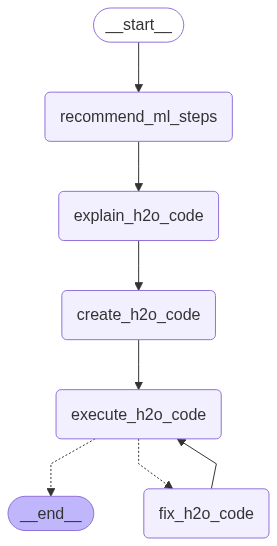

In [8]:
ml_agent._compiled_graph

In [17]:
# --- NEW, DETAILED INSTRUCTIONS ---
# These instructions tell the agent to create a custom model in addition to the H2O run.

user_instructions_with_custom_model = """
Your primary task is to create and run an H2O AutoML model for binary classification,
optimizing for AUC. Use the provided train, test, and calibration sets.

IN ADDITION to the H2O models, you must also perform the following steps:
1.  Import `LogisticRegression` from `sklearn.linear_model` and `CalibratedClassifierCV` from `sklearn.calibration`.
2.  Train a standard `LogisticRegression` model using the training data (`train_data`).
3.  Use the `CalibratedClassifierCV` to calibrate this logistic regression model using the calibration data (`calib_data`). Use the 'isotonic' method.
4.  The final result of your work must be a dictionary. The H2O AutoML results should be returned as usual.
5.  Crucially, you must add a key named 'custom_models' to the final results dictionary. This key's value should be another dictionary containing your calibrated custom model.
    It should look like this:
    'custom_models': {
        'Calibrated_Logistic_Regression': your_trained_calibrated_model_object
    }
"""

# Now, run the agent with these new instructions
ans = ml_agent.invoke_agent(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    X_calib=X_calib,
    y_calib=y_calib,
    user_instructions=user_instructions_with_custom_model,  # <-- Use the new instructions
    max_retries=2,
)

---H2O ML AGENT ENHANCED----
    * RECOMMEND MACHINE LEARNING STEPS
---H2O ML AGENT ENHANCED----
    * EXPLAINING ENHANCED H2O AUTOML CODE
    * CREATE ENHANCED H2O AUTOML CODE WITH OPTUNA
DEBUG: code_prompt_template type: <class 'str'>

DEBUG: recommended_steps type: <class 'str'>
DEBUG: state keys: dict_keys(['messages', 'user_instructions', 'recommended_steps', 'train_data', 'test_data', 'calib_data', 'target_variable', 'feature_columns', 'leaderboard', 'best_model_id', 'model_path', 'model_results', 'optimization_results', 'test_metrics', 'calibration_metrics', 'all_datasets_summary', 'h2o_train_function', 'h2o_train_function_path', 'h2o_train_file_name', 'h2o_train_function_name', 'h2o_train_error', 'max_retries', 'retry_count'])
DEBUG: Final recommended_steps type: <class 'str'>
Syntax error detected: invalid syntax (<unknown>, line 31)
Could not fix syntax errors, using fallback code
      File saved to: logs/h2o_automl_enhanced.py
    * EXECUTING GENERATED CODE
Executing functi

H2O_cluster_uptime:,26 mins 56 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 months and 26 days
H2O_cluster_name:,H2O_from_python_shankii_r51gz7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.943 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
13:34:49.548: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████|

[I 2025-06-23 13:42:16,753] A new study created in memory with name: no-name-0a73aa89-1b99-44e7-94cd-3ad931aa29a8
[I 2025-06-23 13:42:16,831] Trial 0 finished with value: 0.9717971797179717 and parameters: {'n_estimators': 65, 'max_depth': 11, 'min_samples_split': 5}. Best is trial 0 with value: 0.9717971797179717.


████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


[I 2025-06-23 13:42:17,002] Trial 1 finished with value: 0.973897389738974 and parameters: {'n_estimators': 185, 'max_depth': 8, 'min_samples_split': 5}. Best is trial 1 with value: 0.973897389738974.
[I 2025-06-23 13:42:17,143] Trial 2 finished with value: 0.9714971497149715 and parameters: {'n_estimators': 152, 'max_depth': 11, 'min_samples_split': 8}. Best is trial 1 with value: 0.973897389738974.
[I 2025-06-23 13:42:17,276] Trial 3 finished with value: 0.9633963396339633 and parameters: {'n_estimators': 157, 'max_depth': 6, 'min_samples_split': 6}. Best is trial 1 with value: 0.973897389738974.
[I 2025-06-23 13:42:17,386] Trial 4 finished with value: 0.9054905490549054 and parameters: {'n_estimators': 190, 'max_depth': 2, 'min_samples_split': 5}. Best is trial 1 with value: 0.973897389738974.
[I 2025-06-23 13:42:17,438] Trial 5 finished with value: 0.9683968396839684 and parameters: {'n_estimators': 56, 'max_depth': 8, 'min_samples_split': 10}. Best is trial 1 with value: 0.9738973

[LightGBM] [Info] Number of positive: 301, number of negative: 299
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4008
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501667 -> initscore=0.006667
[LightGBM] [Info] Start training from score 0.006667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-06-23 13:42:20,530] Trial 2 finished with value: 0.9765976597659766 and parameters: {'n_estimators': 137, 'max_depth': 11, 'learning_rate': 0.2994864359140659, 'subsample': 0.8178623116525827, 'colsample_bytree': 0.5777266371025495}. Best is trial 1 with value: 0.977997799779978.
[I 2025-06-23 13:42:20,561] Trial 3 finished with value: 0.9616961696169617 and parameters: {'n_estimators': 69, 'max_depth': 3, 'learning_rate': 0.06123290876552999, 'subsample': 0.9597352887414803, 'colsample_bytree': 0.5893682293157025}. Best is trial 1 with value: 0.977997799779978.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-23 13:42:20,736] Trial 4 finished with value: 0.9781978197819781 and parameters: {'n_estimators': 174, 'max_depth': 6, 'learning_rate': 0.17801137069076592, 'subsample': 0.6515686065931607, 'colsample_bytree': 0.7415283062543658}. Best is trial 4 with value: 0.9781978197819781.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-23 13:42:20,882] Trial 5 finished with value: 0.9742974297429743 and parameters: {'n_estimators': 175, 'max_depth': 5, 'learning_rate': 0.04755883658256053, 'subsample': 0.8350558282918497, 'colsample_bytree': 0.6825015155691473}. Best is trial 4 with value: 0.9781978197819781.
[I 2025-06-23 13:42:20,911] Trial 6 finished with value: 0.9717971797179717 and parameters: {'n_estimators': 68, 'max_depth': 3, 'learning_rate': 0.29002846311425634, 'subsample': 0.7393456767408157, 'colsample_bytree': 0.6584303490662513}. Best is trial 4 with value: 0.9781978197819781.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-23 13:42:21,102] Trial 7 finished with value: 0.977097709770977 and parameters: {'n_estimators': 125, 'max_depth': 10, 'learning_rate': 0.1672844699681033, 'subsample': 0.8647122236033029, 'colsample_bytree': 0.7445428429826424}. Best is trial 4 with value: 0.9781978197819781.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-23 13:42:21,206] Trial 8 finished with value: 0.974997499749975 and parameters: {'n_estimators': 122, 'max_depth': 5, 'learning_rate': 0.07109680306092242, 'subsample': 0.9439423639797522, 'colsample_bytree': 0.5270410193598098}. Best is trial 4 with value: 0.9781978197819781.
[I 2025-06-23 13:42:21,343] Trial 9 finished with value: 0.9805980598059806 and parameters: {'n_estimators': 92, 'max_depth': 15, 'learning_rate': 0.265715914592502, 'subsample': 0.7382676945397368, 'colsample_bytree': 0.7139499443912061}. Best is trial 9 with value: 0.9805980598059806.


[LightGBM] [Info] Number of positive: 301, number of negative: 299
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4008
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501667 -> initscore=0.006667
[LightGBM] [Info] Start training from score 0.006667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-06-23 13:42:21,477] A new study created in memory with name: no-name-22a8b48e-6f9c-49e4-9cdf-0c31e57f4b4b
[I 2025-06-23 13:42:21,480] Trial 0 finished with value: 0.8433843384338434 and parameters: {'C': 0.01242536111607445}. Best is trial 0 with value: 0.8433843384338434.
[I 2025-06-23 13:42:21,486] Trial 1 finished with value: 0.8858885888588859 and parameters: {'C': 0.07588149223554855}. Best is trial 1 with value: 0.8858885888588859.
[I 2025-06-23 13:42:21,488] Trial 2 finished with value: 0.8433843384338434 and parameters: {'C': 0.01242700403724622}. Best is trial 1 with value: 0.8858885888588859.
[I 2025-06-23 13:42:21,493] Trial 3 finished with value: 0.8791879187918792 and parameters: {'C': 0.040464439541380806}. Best is trial 1 with value: 0.8858885888588859.
[I 2025-06-23 13:42:21,516] Trial 4 finished with value: 0.8877887788778878 and parameters: {'C': 0.6918716058846417}. Best is trial 4 with value: 0.8877887788778878.
[I 2025-06-23 13:42:21,535] Trial 5 finished w

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-23 13:42:21,643] Trial 7 finished with value: 0.8876887688768877 and parameters: {'C': 3.413047549105839}. Best is trial 6 with value: 0.8884888488848885.
[I 2025-06-23 13:42:21,668] Trial 8 finished with value: 0.8877887788778878 and parameters: {'C': 0.7145298144548199}. Best is trial 6 with value: 0.8884888488848885.
[I 2025-06-23 13:42:21,683] Trial 9 finished with value: 0.8875887588758875 and parameters: {'C': 0.3887393271983658}. Best is trial 6 with value: 0.8884888488848885.
[I 2025-06-23 13:42:21,686] A new study created in memory with name: no-name-edece197-ca6a-4a1e-a9fd-f722f570a2a4
[I 2025-06-23 13:42:21,692] Trial 0 finished with value: 0.8876887688768876 and parameters: {'C': 0.7674072849776096}. Best is trial 0 with value: 0.8876887688768876.
[I 2025-06-23 13:42:21,701] Trial 1 finished with value: 0.8876887688768876 and parameters: {'C': 0.016864669509401475}. Best is trial 0 with value: 0.8876887688768876.
[I 2025-06-23 13:42:21,706] Trial 2 finished with 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
No custom models found in agent response. Run the agent first.


In [13]:
# ml_agent.plot_custom_models_reliability_curves()

In [15]:
ml_agent.get_leaderboard()

,model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,brier_score
0,StackedEnsemble_AllModels_1_AutoML_2_20250623_...,0.986144,0.144496,0.987588,0.041673,0.195236,0.038117,0.034040
1,DeepLearning_grid_3_AutoML_2_20250623_133010_m...,0.978939,0.266918,0.981598,0.066656,0.246699,0.060860,0.034796
2,StackedEnsemble_BestOfFamily_1_AutoML_2_202506...,0.984044,0.158956,0.985671,0.056690,0.214035,0.045811,0.035715
3,DeepLearning_grid_2_AutoML_2_20250623_133010_m...,0.974333,0.256274,0.977884,0.071695,0.245756,0.060396,0.041561
4,DeepLearning_grid_1_AutoML_2_20250623_133010_m...,0.971150,0.265046,0.969860,0.071684,0.250439,0.062720,0.046689
5,DeepLearning_grid_3_AutoML_2_20250623_133010_m...,0.972300,0.278282,0.972924,0.068373,0.246777,0.060899,0.049242
6,GBM_2_AutoML_2_20250623_133010,0.972811,0.202992,0.972011,0.066723,0.238417,0.056843,0.055588
7,DeepLearning_grid_2_AutoML_2_20250623_133010_m...,0.976905,0.242142,0.977490,0.064951,0.235654,0.055533,0.056928
8,GBM_grid_1_AutoML_2_20250623_133010_model_5,0.969711,0.217325,0.969251,0.076756,0.247834,0.061422,0.057496
9,GBM_4_AutoML_2_20250623_133010,0.972772,0.204110,0.969011,0.070067,0.239119,0.057178,0.057763


In [16]:
import h2o

model = h2o.get_model(ml_agent.get_best_model_id())

model

key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/20
# GBM base models (used / total),2/10
# DeepLearning base models (used / total),4/7
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None
